In [2]:
import os
import shutil
import random
import splitfolders
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Class weight calculation
from sklearn.utils.class_weight import compute_class_weight

# Keras library
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img,save_img
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

# Different CNN Model
from keras.applications import VGG16, DenseNet121, MobileNetV2, DenseNet201

#  Distributed Computing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\PC\AppData\Local\Temp\ipykernel_4988\3295952624.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
'''# Paths
input_folder = 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
output_folder = 'CT-KIDNEY-DATASET-SPLIT'
train_folder = os.path.join(output_folder, 'train')
test_folder = os.path.join(output_folder, 'test')

# Split the dataset into training (80%) and testing (20%) sets
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2))

# Function to get the number of images in each class
def get_class_counts(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Get the initial class counts
initial_class_counts = get_class_counts(train_folder)
max_count = max(initial_class_counts.values())

# Set up the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to augment images in a class
def augment_class_images(class_name, target_count):
    class_path = os.path.join(train_folder, class_name)
    image_files = os.listdir(class_path)
    current_count = len(image_files)
    while current_count < target_count:
        img_path = os.path.join(class_path, random.choice(image_files))
        img = load_img(img_path)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix=class_name, save_format='jpg'):
            i += 1
            current_count += 1
            if current_count >= target_count or i >= target_count:
                break

# Augment images in each class to balance the dataset
for class_name, count in initial_class_counts.items():
    augment_class_images(class_name, max_count)

print("Data augmentation complete. Dataset is balanced.")'''#Used to create the balanced augmented dataset

'# Paths\ninput_folder = \'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\'\noutput_folder = \'CT-KIDNEY-DATASET-SPLIT\'\ntrain_folder = os.path.join(output_folder, \'train\')\ntest_folder = os.path.join(output_folder, \'test\')\n\n# Split the dataset into training (80%) and testing (20%) sets\nsplitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2))\n\n# Function to get the number of images in each class\ndef get_class_counts(folder_path):\n    class_counts = {}\n    for class_name in os.listdir(folder_path):\n        class_path = os.path.join(folder_path, class_name)\n        if os.path.isdir(class_path):\n            class_counts[class_name] = len(os.listdir(class_path))\n    return class_counts\n\n# Get the initial class counts\ninitial_class_counts = get_class_counts(train_folder)\nmax_count = max(initial_class_counts.values())\n\n# Set up the data augmentation generator\ndatagen = ImageDataGenerator(\n    rotation_range=20,\n    width_shift_range=0.2,\n    heigh

In [4]:
BATCH_SIZE = 48

image_height = 224
image_width = 224
# Data agumentation and pre-processing using tensorflow
data_generator_1 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=5,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            brightness_range = [0.95,1.05],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'
                        )

print('Data Augmentation 1 was created')

data_generator_2 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            brightness_range = [0.9,1.1],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'
                        )
print('Data Augmentation 2 was created')

Data Augmentation 1 was created
Data Augmentation 2 was created


In [5]:
train_generator1 = data_generator_1.flow_from_directory(
    directory=r"CT-KIDNEY-DATASET-SPLIT\train",
    color_mode="rgb",
    target_size=(image_height, image_width),
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

print('Data Augmentation 1 was used to generate the train data set\n')

test_generator = data_generator_2.flow_from_directory(
    directory=r"CT-KIDNEY-DATASET-SPLIT\test",
    color_mode="rgb",
    target_size=(image_height, image_width),
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

Found 15575 images belonging to 4 classes.
Data Augmentation 1 was used to generate the train data set

Found 2491 images belonging to 4 classes.


In [6]:
dict_class = train_generator1.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())  # storing class/breed names in a list
print('Class labels: {}'.format(class_names))

Dictionary: {'Cyst': 0, 'Normal': 1, 'Stone': 2, 'Tumor': 3}
Class labels: ['Cyst', 'Normal', 'Stone', 'Tumor']


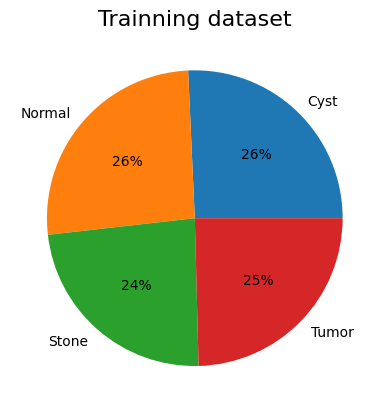

In [7]:
frequency = np.unique(train_generator1.classes, return_counts=True)

plt.title("Trainning dataset", fontsize='16')
plt.pie(frequency[1], labels = class_names, autopct='%1.0f%%');

In [8]:
# Dataset characteristics
print("Dataset Characteristics of Train Data Set:")
print("Number of images:", len(train_generator1.classes))
print("Number of Cyst images:", len([label for label in train_generator1.classes if label == 0]))
print("Number of Normal images:", len([label for label in train_generator1.classes if label == 1]))
print("Number of Stone pneumonia images:", len([label for label in train_generator1.classes if label == 2]))
print("Number of Tumor pneumonia images:", len([label for label in train_generator1.classes if label == 3]))
print()

print("Dataset Characteristics of Test Data Set:")
print("Number of images:", len(test_generator.classes))
print("Number of Cyst pneumonia images:", len([label for label in test_generator.classes if label == 0]))
print("Number of Normal images:", len([label for label in test_generator.classes if label == 1]))
print("Number of Stone pneumonia images:", len([label for label in test_generator.classes if label == 2]))
print("Number of Tumor pneumonia images:", len([label for label in test_generator.classes if label == 3]))
print()

Dataset Characteristics of Train Data Set:
Number of images: 15575
Number of Cyst images: 4006
Number of Normal images: 4061
Number of Stone pneumonia images: 3678
Number of Tumor pneumonia images: 3830

Dataset Characteristics of Test Data Set:
Number of images: 2491
Number of Cyst pneumonia images: 742
Number of Normal images: 1016
Number of Stone pneumonia images: 276
Number of Tumor pneumonia images: 457



In [9]:
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_generator1.classes), y= train_generator1.classes)
class_weights = dict(zip(np.unique(train_generator1.classes), class_weights))
class_weights

{0: 0.971979530703944,
 1: 0.9588155626692932,
 2: 1.0586595976073954,
 3: 1.016644908616188}

Train image data from Data Augmentation 1


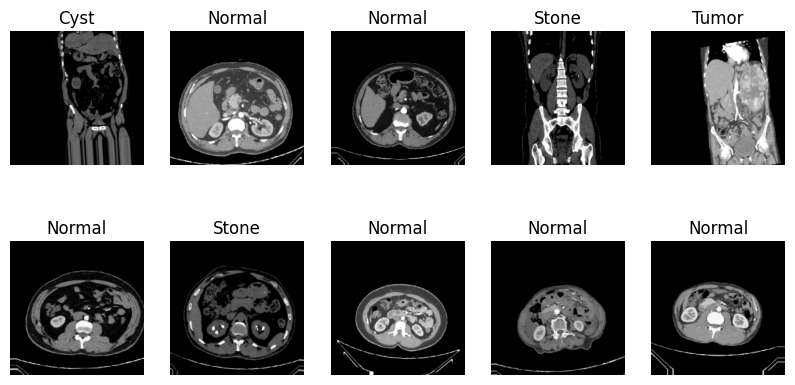

In [10]:
print('Train image data from Data Augmentation 1')
img, label = next(train_generator1)
# print(len(label))

plt.figure(figsize=[10, 5])
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label[i])])
plt.show()

In [11]:
# Define the epochs for training
EPOCHS = 15

# Define the number of GPUs to use
num_gpus = 2

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, restore_best_weights=True)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=10, verbose=1)

train_data = train_generator1


In [12]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy()

# Open a strategy scope
with strategy.scope():

    # Load the pre-trained VGG16 model without the top classification layer
    base_model_VGG16 = VGG16(weights='imagenet', include_top=False, 
                             input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_VGG16.layers:
        layer.trainable = False

    # Create a new model and add the VGG16 base model
    model_VGG16 = Sequential()
    model_VGG16.add(base_model_VGG16)

    # Add a fully connected layer and output layer for classification
    model_VGG16.add(GlobalAveragePooling2D())
    model_VGG16.add(Dense(128, activation='relu'))
    model_VGG16.add(Dropout(0.4))
    model_VGG16.add(Dense(64, activation='relu'))
    model_VGG16.add(Dropout(0.2))
    model_VGG16.add(Dense(32, activation='relu'))
    model_VGG16.add(Dropout(0.2))
    model_VGG16.add(Dense(16, activation='relu'))
    model_VGG16.add(Dropout(0.2))
    model_VGG16.add(Dense(4, activation='softmax'))


    # Model summary
    print("Model Summary (VGG16):")
    model_VGG16.summary()
    
    # Compile the model
    model_VGG16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_VGG16 = model_VGG16.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_VGG16, val_accuracy_VGG16 = model_VGG16.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_VGG16:.4f}')
    print(f'Validation Accuracy: {val_accuracy_VGG16:.4f}')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Model Summary (VGG16):
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                             

In [13]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy()

# Open a strategy scope
with strategy.scope():

    # Load the pre-trained MobileNetV2 model without the top classification layer
    base_model_MobileNet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_MobileNet.layers:
        layer.trainable = False

    # Create a new model and add the MobileNetV2 base model
    model_MobileNet = Sequential()
    model_MobileNet.add(base_model_MobileNet)

    # Add a global average pooling layer and output layer for classification
    model_MobileNet.add(GlobalAveragePooling2D())
    model_MobileNet.add(Dense(128, activation='relu'))
    model_MobileNet.add(Dropout(0.4))
    model_MobileNet.add(Dense(64, activation='relu'))
    model_MobileNet.add(Dropout(0.4))
    model_MobileNet.add(Dense(32, activation='relu'))
    model_MobileNet.add(Dropout(0.4))
    model_MobileNet.add(Dense(4, activation='softmax'))

    # Model summary
    print("Model Summary (MobileNetV2):")
    model_MobileNet.summary()
    

    # Compile the model
    model_MobileNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_MobileNet = model_MobileNet.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_MobileNet, val_accuracy_MobileNet = model_MobileNet.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_MobileNet:.4f}')
    print(f'Validation Accuracy: {val_accuracy_MobileNet:.4f}')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model Summary (MobileNetV2):
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 128)               163968    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                

In [14]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy()

# Open a strategy scope
with strategy.scope():

    # Load the pre-trained DenseNet121 model without the top classification layer
    base_model_DenseNet = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_DenseNet.layers:
        layer.trainable = False

    # Create a new model and add the DenseNet121 base model
    model_DenseNet = Sequential()
    model_DenseNet.add(base_model_DenseNet)

    # Add a global average pooling layer and output layer for classification
    model_DenseNet.add(GlobalAveragePooling2D())
    model_DenseNet.add(Dense(128, activation='relu'))
    model_DenseNet.add(Dropout(0.4))
    model_DenseNet.add(Dense(64, activation='relu'))
    model_DenseNet.add(Dropout(0.2))
    model_DenseNet.add(Dense(32, activation='relu'))
    model_DenseNet.add(Dropout(0.2))
    model_DenseNet.add(Dense(4, activation='softmax'))

    # Model summary
    print("Model Summary (DenseNet121):")
    model_DenseNet.summary()
    

    # Compile the model
    model_DenseNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_DenseNet = model_DenseNet.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_DenseNet, val_accuracy_DenseNet = model_DenseNet.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_DenseNet:.4f}')
    print(f'Validation Accuracy: {val_accuracy_DenseNet:.4f}')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model Summary (DenseNet121):
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_9 (Dense)             (None, 128)               131200    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                       

In [15]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy()

# Open a strategy scope
with strategy.scope():

    # Load the pre-trained InceptionV3 model without the top classification layer
    base_model_Densenet201 = DenseNet201(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_Densenet201.layers:
        layer.trainable = False

    # Create a new model and add the InceptionV3 base model
    model_Densenet201 = Sequential()
    model_Densenet201.add(base_model_Densenet201)

    # Add a global average pooling layer and output layer for classification
    model_Densenet201.add(GlobalAveragePooling2D())
    model_Densenet201.add(Dense(128, activation='relu'))
    model_Densenet201.add(Dropout(0.4))
    model_Densenet201.add(Dense(64, activation='relu'))
    model_Densenet201.add(Dropout(0.4))
    model_Densenet201.add(Dense(32, activation='relu'))
    model_Densenet201.add(Dropout(0.4))
    model_Densenet201.add(Dense(4, activation='softmax'))

    # Model summary
    print("Model Summary (InceptionV3):")
    model_Densenet201.summary()
    print()

    # Compile the model
    model_Densenet201.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with EarlyStopping
    history_Densenet201 = model_Densenet201.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_Densenet201, val_accuracy_Densenet201 = model_Densenet201.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_Densenet201:.4f}')
    print(f'Validation Accuracy: {val_accuracy_Densenet201:.4f}')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model Summary (InceptionV3):
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_3  (None, 1920)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_13 (Dense)            (None, 128)               245888    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                       

In [16]:
data = {
    'VGG16': val_accuracy_VGG16,
    'MobileNet': val_accuracy_MobileNet,
    'DenseNet121': val_accuracy_DenseNet,
    'Densenet201': val_accuracy_Densenet201
}

In [17]:
df = pd.DataFrame.from_dict(data, orient='index', columns=['accuracy'])
df = df.reset_index().rename(columns={'index': 'model'})

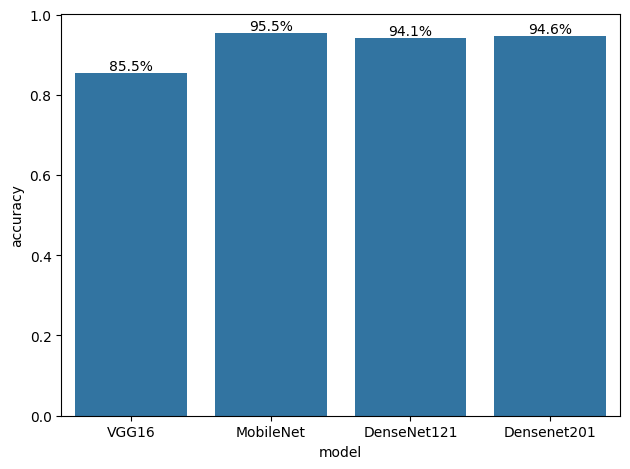

In [18]:
# Create bar chart
sns.barplot(x='model', y='accuracy', data=df)

# Add labels to bars
ax = plt.gca()
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', labels=[f"{x:.1%}" for x in bar.datavalues], fontsize=10)

# Adjust the layout
plt.tight_layout()

plt.show()

Use the model that got highest accuracy in every code (change model_MobileNet to one that is appropriate)

In [22]:
# Fine-tune the model with frozen layers

# Unfreeze the base_model
no_base_layers = len(model_MobileNet.layers)
print('No. of base layers in the model = {}\n'.format(no_base_layers))

# no of layers for fine-tune
no_finetune_layers = int(no_base_layers/2)
print('No. of layers for fine-tune = {}'.format(no_finetune_layers))

No. of base layers in the model = 9

No. of layers for fine-tune = 4


In [21]:
for layer in model_MobileNet.layers:
    print("Layer Name:", layer.name)
    print("Layer Type:", type(layer).__name__)
    print("Input Shape:", layer.input_shape)
    print("Output Shape:", layer.output_shape)
    print("Trainable:", layer.trainable)
    print("===================")


Layer Name: mobilenetv2_1.00_224
Layer Type: Functional
Input Shape: (None, 224, 224, 3)
Output Shape: (None, 7, 7, 1280)
Trainable: True
Layer Name: global_average_pooling2d_1
Layer Type: GlobalAveragePooling2D
Input Shape: (None, 7, 7, 1280)
Output Shape: (None, 1280)
Trainable: True
Layer Name: dense_5
Layer Type: Dense
Input Shape: (None, 1280)
Output Shape: (None, 128)
Trainable: True
Layer Name: dropout_4
Layer Type: Dropout
Input Shape: (None, 128)
Output Shape: (None, 128)
Trainable: True
Layer Name: dense_6
Layer Type: Dense
Input Shape: (None, 128)
Output Shape: (None, 64)
Trainable: True
Layer Name: dropout_5
Layer Type: Dropout
Input Shape: (None, 64)
Output Shape: (None, 64)
Trainable: True
Layer Name: dense_7
Layer Type: Dense
Input Shape: (None, 64)
Output Shape: (None, 32)
Trainable: True
Layer Name: dropout_6
Layer Type: Dropout
Input Shape: (None, 32)
Output Shape: (None, 32)
Trainable: True
Layer Name: dense_8
Layer Type: Dense
Input Shape: (None, 32)
Output Shape: (

In [23]:
# Fine-tune the model
model_MobileNet.trainable = True
for layer in model_MobileNet.layers[: -no_finetune_layers]:
    layer.trainable = False

# small learning rate for fine tuning
model_MobileNet.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_finetune_MobileNet = model_MobileNet.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping])

Epoch 1/15
325/325 [==============================] - 289s 878ms/step - loss: 0.0952 - accuracy: 0.9695 - val_loss: 0.1175 - val_accuracy: 0.9627
Epoch 2/15
325/325 [==============================] - 277s 852ms/step - loss: 0.1031 - accuracy: 0.9676 - val_loss: 0.1230 - val_accuracy: 0.9534
Epoch 3/15
325/325 [==============================] - 269s 828ms/step - loss: 0.0925 - accuracy: 0.9714 - val_loss: 0.1250 - val_accuracy: 0.9570
Epoch 4/15
325/325 [==============================] - 275s 845ms/step - loss: 0.0933 - accuracy: 0.9710 - val_loss: 0.1201 - val_accuracy: 0.9591
Epoch 4: early stopping


In [24]:
# Validate the model
print('====== Model Validation ======')
val_loss_finetune_MobileNet, val_accuracy_finetune_MobileNet = model_MobileNet.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {val_loss_finetune_MobileNet:.4f}')
print(f'Validation Accuracy: {val_accuracy_finetune_MobileNet:.4f}')

====== Model Validation ======
52/52 [==============================] - 37s 706ms/step - loss: 0.1329 - accuracy: 0.9591
Validation Loss: 0.1329
Validation Accuracy: 0.9591


In [25]:
# Perform predictions to allow computation of the confusion matrix later on
# Do not shuffle predictions otherwise we have no way of finding out the true labels
MobileNet_test_preds = model_MobileNet.predict(test_generator)
MobileNet_test_pred_classes = np.argmax(MobileNet_test_preds, axis=1)

52/52 [==============================] - 38s 697ms/step


2/2 [==============================] - 1s 174ms/step


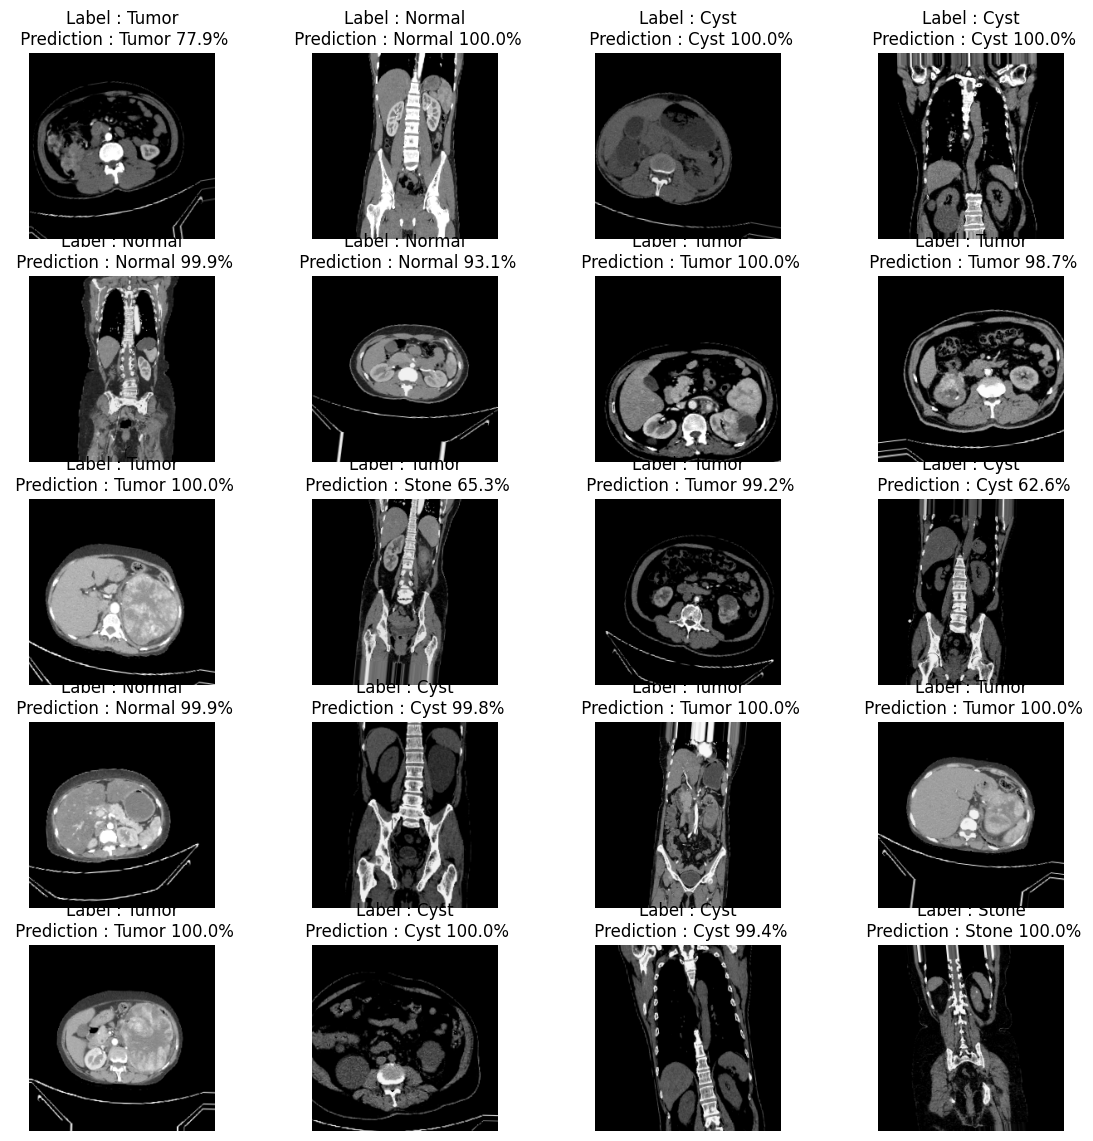

In [26]:
test_generator.reset()
img, label = next(test_generator)

prediction = model_MobileNet.predict(img)
test_pred_classes = np.argmax(prediction, axis=1)

plt.figure(figsize=[14, 14])
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_classes[i]], 100 * np.max(prediction[i])))
plt.show()

In [33]:
test_dir = r"CT-KIDNEY-DATASET-SPLIT\test"

# Image dimensions
image_height = 224
image_width = 224

# Create ImageDataGenerator for test data
test_data_generator = ImageDataGenerator(rescale=1./255)

# Load test data using the generator
test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=1,
    shuffle=False,  # Important: Set shuffle to False to maintain order
    class_mode='categorical'
)

# Get predictions and true labels
y_pred = model_MobileNet.predict(test_generator, steps=len(test_generator))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
file_names = test_generator.filenames

# Identify mispredicted indices
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Print file names of mispredicted images
print("\nMispredicted File Names:")
for idx in misclassified_indices:
    print(file_names[idx])

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Classification Report
class_names = list(test_generator.class_indices.keys())
class_report = classification_report(y_true, y_pred_classes, target_names=class_names)

# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display Classification Report
print("\nClassification Report:")
print(class_report)

Found 2491 images belonging to 4 classes.
2491/2491 [==============================] - 33s 13ms/step

Mispredicted File Names:
Cyst\Cyst- (3031).jpg
Cyst\Cyst- (3033).jpg
Cyst\Cyst- (3035).jpg
Normal\Normal- (1032).jpg
Normal\Normal- (132).jpg
Normal\Normal- (140).jpg
Normal\Normal- (142).jpg
Normal\Normal- (155).jpg
Normal\Normal- (157).jpg
Normal\Normal- (158).jpg
Normal\Normal- (159).jpg
Normal\Normal- (1590).jpg
Normal\Normal- (1591).jpg
Normal\Normal- (1593).jpg
Normal\Normal- (1617).jpg
Normal\Normal- (1623).jpg
Normal\Normal- (163).jpg
Normal\Normal- (164).jpg
Normal\Normal- (1665).jpg
Normal\Normal- (1669).jpg
Normal\Normal- (168).jpg
Normal\Normal- (1688).jpg
Normal\Normal- (169).jpg
Normal\Normal- (1694).jpg
Normal\Normal- (173).jpg
Normal\Normal- (177).jpg
Normal\Normal- (182).jpg
Normal\Normal- (1820).jpg
Normal\Normal- (1835).jpg
Normal\Normal- (184).jpg
Normal\Normal- (1845).jpg
Normal\Normal- (1849).jpg
Normal\Normal- (185).jpg
Normal\Normal- (1883).jpg
Normal\Normal- (1

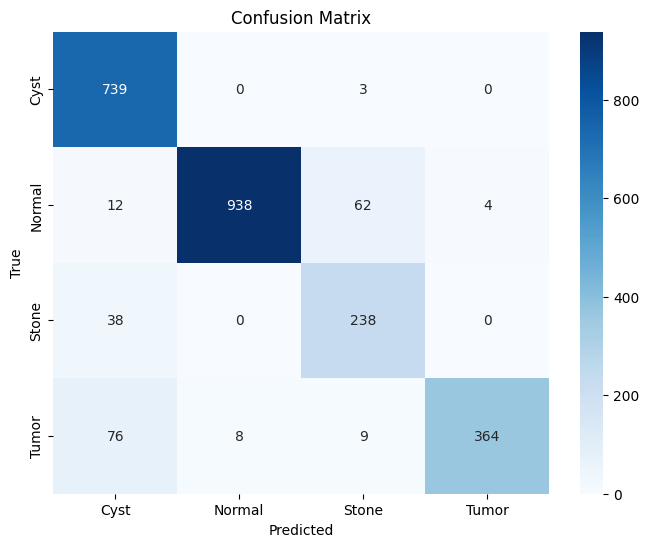

Classification Report:
              precision    recall  f1-score   support

        Cyst       0.85      1.00      0.92       742
      Normal       0.99      0.92      0.96      1016
       Stone       0.76      0.86      0.81       276
       Tumor       0.99      0.80      0.88       457

    accuracy                           0.91      2491
   macro avg       0.90      0.89      0.89      2491
weighted avg       0.92      0.91      0.92      2491



In [34]:
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print Classification Report
print('Classification Report:')
print(class_report)

In [ ]:

'''
# Save model architecture to JSON file
model_json = model_MobileNet.to_json()
with open("Mobile_classifier.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights to HDF5 file
model_MobileNet.save_weights("Mobile_classifier_weights.h5")

'''

In [ ]:
#import tensorflowjs as tfjs
#tfjs.converters.save_keras_model(model_MobileNet,'./keras_model')

In [30]:
model_MobileNet.save("MobileNet-model.h5")
#https://heartbeat.comet.ml/converting-tensorflow-keras-models-built-in-python-to-javascript-4ae4f7bcac86
#https://www.youtube.com/watch?v=yWBM2-Rx47M
#https://medium.com/@mandava807/importing-a-keras-model-into-tensorflow-js-b09600a95e40

In [ ]:
'''from keras.models import load_model

# Load the model architecture from the model.h5 file
model = load_model('DenseNet-model.h5')

# Display the architecture
print("Model architecture:")
model.summary()

# Load the weights file
model.load_weights('DenseNet-weights.h5')

# Check the architecture again to see if it matches the weights
print("\nModel architecture after loading weights:")
model.summary()
'''